# So, you want to be a data scientist?

An analysis of  data collected by Stack Overflow as part of their annual 2018 developer survey.
The data can be downloaded from: https://insights.stackoverflow.com/survey/2018

In this project  we will try to understand more about data science field, with the help of data. This project is intended to help individuals considering new career as data scientists;  to help them make informed decisions about their career choice. We would try to answer three real world questions using the CRISP-DM Process (Cross Industry Process for Data Mining). 

- What is the general profile of a data scientist (DS)?
- How is the typical employment, schedule  and salaries look like?
- What type of technology is needed to break into this field?.


In [1]:

import os

print(os.listdir("./inputData"))

['2018_survey_results_public.csv', '2018_survey_results_public.trim.csv', '2018_survey_results_schema.csv']


In [2]:
# Import libraries

import pandas as pd 
import numpy as np 
from pandas import Series

import matplotlib
import matplotlib.pyplot as plt 
import seaborn as sns 
color = sns.color_palette()

from numpy import array
from matplotlib import cm
import warnings
warnings.filterwarnings('ignore')
from IPython.core.display import display, HTML, Javascript
import json, random
from string import Template
from collections import Counter 

#pd.options.display.max_colwidth = 800
#pd.set_option('display.max_colwidth', -1)
pd.set_option('display.max_columns', None)  # or 1000
pd.set_option('display.max_rows', None)  # or 1000

## Data exploration

In the following cells, we will gather data, clean it and make some necessary manipulations needed for further studies

In [3]:
df = pd.read_csv('inputData/2018_survey_results_public.csv')
df_schema = pd.read_csv('inputData/2018_survey_results_schema.csv')
#df11_public = pd.read_csv('inputData/2011_survey_results_public.csv', delimiter=',')

In [4]:
# Print shape of dataset
print('The dataset contains', df.shape[0], 'rows and', df.shape[1], 'columns.')

The dataset contains 98855 rows and 129 columns.


In [5]:
#look at the schema
pd.options.display.max_colwidth = 300
df_schema

,Column,QuestionText
0,Respondent,Randomized respondent ID number (not in order of survey response time)
1,Hobby,Do you code as a hobby?
2,OpenSource,Do you contribute to open source projects?
3,Country,In which country do you currently reside?
4,Student,"Are you currently enrolled in a formal, degree-granting college or university program?"
5,Employment,Which of the following best describes your current employment status?
6,FormalEducation,Which of the following best describes the highest level of formal education that you’ve completed?
7,UndergradMajor,You previously indicated that you went to a college or university. Which of the following best describes your main field of study (aka 'major')
8,CompanySize,Approximately how many people are employed by the company or organization you work for?
9,DevType,Which of the following describe you? Please select all that apply.


In [6]:
##top 15 countries
#print("Country \t Number of users")
#print(df['Country'].value_counts().nlargest(15))


Since we are interested in data scientists, make a reduced data set by dropping columns that are not necessary for our investigation

In [7]:
# Drop unnecessary columns
dfr = df[['Respondent', 'Country','Employment','DevType', 'Gender', 'Age', 'FormalEducation', 'UndergradMajor', 
             'EducationTypes', 'SelfTaughtTypes', 'LanguageWorkedWith', 'LanguageDesireNextYear',
             'DatabaseWorkedWith','DatabaseDesireNextYear', 'PlatformWorkedWith', 'FrameworkWorkedWith',
             'FrameworkDesireNextYear','YearsCoding','YearsCodingProf', 'JobSatisfaction', 
             'CareerSatisfaction','HopeFiveYears','WakeTime','HoursComputer','HoursOutside',
             'Exercise','Salary','CompanySize','ConvertedSalary','LastNewJob']]


From the dataset, look for 'DeVType', inparticular the string contains 'data scientist'

In [8]:
#Delete rows where DevType is missing 
dfr = dfr[pd.notnull(dfr['DevType'])]

### Do some manipulations  of the certain columns, so that it will be easier for later analysis

In [9]:
#convert the education to simple titles
dfr["FormalEducation"][dfr["FormalEducation"] == "Bachelor’s degree (BA, BS, B.Eng., etc.)"] = "Bachelors"
dfr["FormalEducation"][dfr["FormalEducation"] == "Master’s degree (MA, MS, M.Eng., MBA, etc.)"] = "Masters"
dfr["FormalEducation"][dfr["FormalEducation"] == "Some college/university study without earning a degree"] = "No degree"
dfr["FormalEducation"][dfr["FormalEducation"] == "Secondary school (e.g. American high school, German Realschule or Gymnasium, etc.)"] = "No degree"
dfr["FormalEducation"][dfr["FormalEducation"] == "Other doctoral degree (Ph.D, Ed.D., etc.)"] = "Doctoral"
dfr["FormalEducation"][dfr["FormalEducation"] == "Primary/elementary school"] = "No degree"
dfr["FormalEducation"][dfr["FormalEducation"] == "Professional degree (JD, MD, etc.)"] = "Professional"
dfr["FormalEducation"][dfr["FormalEducation"] == "I never completed any formal education"] = "No degree"
dfr["FormalEducation"][dfr["FormalEducation"] == "Associate degree"] = "Associate"

In [10]:
#convert  majors into simplified versions
dfr["UndergradMajor"][dfr["UndergradMajor"] == "Computer science, computer engineering, or software engineering"]= "CompSci" 
dfr["UndergradMajor"][dfr["UndergradMajor"] == "Mathematics or statistics"]= "MathStat" 
dfr["UndergradMajor"][dfr["UndergradMajor"] == "A natural science (ex. biology, chemistry, physics)"]= "NatSci"
dfr["UndergradMajor"][dfr["UndergradMajor"] == "Another engineering discipline (ex. civil, electrical, mechanical)"]= "Eng"  
dfr["UndergradMajor"][dfr["UndergradMajor"] == "Information systems, information technology, or system administration"]= "IT"  
dfr["UndergradMajor"][dfr["UndergradMajor"] == "A social science (ex. anthropology, psychology, political science)"]= "Arts/Humanities"  
dfr["UndergradMajor"][dfr["UndergradMajor"] == "A business discipline (ex. accounting, finance, marketing)"]= "Business"  
dfr["UndergradMajor"][dfr["UndergradMajor"] == "A humanities discipline (ex. literature, history, philosophy)"]= "Arts/Humanities"
dfr["UndergradMajor"][dfr["UndergradMajor"] == "Web development or web design"]= "Other"
dfr["UndergradMajor"][dfr["UndergradMajor"] == "Fine arts or performing arts (ex. graphic design, music, studio art)"]= "Other"
dfr["UndergradMajor"][dfr["UndergradMajor"] == "I never declared a major"]= "Other"
dfr["UndergradMajor"][dfr["UndergradMajor"] == "A health science (ex. nursing, pharmacy, radiology)"]= "Other"

In [11]:
# Create data scientist and non-data scientist subsets.
dfr_ds = dfr[dfr['DevType'].str.contains('Data scientist') == True]
dfr_nds = dfr[dfr['DevType'].str.contains('Data scientist') == False]
print ("All Devoloper  dataframe shape: ",dfr.shape)
print ("Non Data science dataframe shape: ",dfr_nds.shape)
print ("Data science dataframe shape: ",dfr_ds.shape)

All Devoloper  dataframe shape:  (92098, 30)
Non Data science dataframe shape:  (85010, 30)
Data science dataframe shape:  (7088, 30)


### Define some helpful functions for later analysis

In [12]:
def getUniqueInCol(df_in,colname):
      
    """
     Get the different  unique  entries in a given column from a given dataframe
      
     Input:
        dataframe
     Output:
       Prints unique coulmn entries,  counts and relative percentages
    """
    
    
    print("Input column Name is",colname )
    print("Numer of unique non-null values in the given column is :", df_in[colname].nunique())
    print("\n They are (in counts) \n")
    df=df_in.dropna(subset=[colname])
    print(df[colname].value_counts(sort=True,dropna=True))
    print("\n and in relative percentage ... \n")
    print(df[colname].value_counts(sort=True,dropna=True)/len(df)*100)
    print("==============================================================================")

##======================================================================

def aggregateMultSel(df_in,incol):
    """
     Get the fields with multiple selection (such as in 'LanguageWorkedWith')
     add up each entries, aggregate and give the output after removing NA
     Input:
        dataframe
     Output:
       dataframe with unique entries, counts, relative percentage
    """
    
    incol=df_in[incol].dropna()
    #var=df_in.incol
    outcol=[]
    for i in incol:
        for j in (str(i).split(';')):
            outcol.append(j)
            #print(incol,j)
    tmp=pd.Series(outcol)
    tmp=tmp.value_counts()
    tmp_sum=np.sum(tmp.values)
    #print("tmp sum",tmp_sum )
    out_df=pd.DataFrame({'Item':tmp.index, 'Count':tmp.values, 'pcnt_count':(tmp.values)*100/tmp_sum})
    #out_df = pd.DataFrame(tmp_df, columns=['Items', 'Count'])
    out_df= out_df.dropna()
    return out_df
##======================================================================
def barPlot(var_tmp,tit,ylab,xlab):
    """
     Plot a bar chart the first 10 variables of input varaibale var_tmp
     Input:
        var_tmp=variable to be plotted
        tit= title of plot
        ylab= yaxis title
        xlab= xaxis title
    
    """
    plt.figure(figsize=(10,7))
    x=var_tmp.Item[:10,] #first 10
    y=var_tmp.Count
    y=y/(y.sum())*100
    sns.barplot( x,y, alpha=0.8)
    plt.title(tit)
    plt.ylabel(ylab, fontsize=12)
    plt.xlabel(xlab, fontsize=12)
    plt.xticks(rotation=70)
    plt.grid()
##======================================================================    
def bar10Plot(var_tmp,tit,ylab,xlab):
    """
     Plot a bar chart the first 10 variables of input varaibale var_tmp
     with absolute values on y axis
     Input:
        var_tmp=variable to be plotted
        tit= title of plot
        ylab= yaxis title
        xlab= xaxis title
    """
    plt.figure(figsize=(10,7))
    x=var_tmp.Item[:10,] #first 10
    y=var_tmp.Count
    sns.barplot(x,y, alpha=0.8)
    plt.title(tit)
    plt.ylabel(ylab, fontsize=12)
    plt.xlabel(xlab, fontsize=12)
    plt.xticks(rotation=70)
    plt.grid()
##======================================================================    
def pointPlot(x,y,tit,ylab,xlab,order_in):
    """
    Plot a point plot with the order given by order_in variable
     Input:
        x = x value to be plotted
        y = y value to be plotted
        tit= title of plot
        ylab= yaxis title
        xlab= xaxis title
        order_in= order in which  x axis values to be plotted 
    """   
    plt.figure(figsize=(10,7))
    sns.pointplot(x,y,alpha=0.8,order=order_in)
# Rotate the labels on x-axis
    plt.title(tit)
    plt.ylabel(ylab, fontsize=12)
    plt.xticks(rotation=70)
    plt.xlabel(xlab, fontsize=12)
    plt.grid()

## General profile

Firts look at the general profile

### Geography

In [13]:
##top 15 countries
print("Country    \tNumber of DS")
tmp_count=dfr_ds['Country'].value_counts().nlargest(15)
print( tmp_count)

print("")
print("Country         \tPercent")
print( round(tmp_count/len(dfr_ds)*100,2))

Country    	Number of DS
United States         1754
India                  799
Germany                520
United Kingdom         431
Canada                 247
France                 220
Russian Federation     183
Brazil                 174
Netherlands            140
Australia              131
Spain                  131
Italy                  130
Poland                 121
Switzerland            104
Sweden                  85
Name: Country, dtype: int64

Country         	Percent
United States         24.75
India                 11.27
Germany                7.34
United Kingdom         6.08
Canada                 3.48
France                 3.10
Russian Federation     2.58
Brazil                 2.45
Netherlands            1.98
Australia              1.85
Spain                  1.85
Italy                  1.83
Poland                 1.71
Switzerland            1.47
Sweden                 1.20
Name: Country, dtype: float64


### Age

Input column Name is Age
Numer of unique non-null values in the given column is : 7

 They are (in counts) 

25 - 34 years old     2512
18 - 24 years old     1194
35 - 44 years old      855
45 - 54 years old      261
Under 18 years old     117
55 - 64 years old       83
65 years or older       15
Name: Age, dtype: int64

 and in relative percentage ... 

25 - 34 years old     49.870955
18 - 24 years old     23.704586
35 - 44 years old     16.974390
45 - 54 years old      5.181656
Under 18 years old     2.322811
55 - 64 years old      1.647806
65 years or older      0.297796
Name: Age, dtype: float64


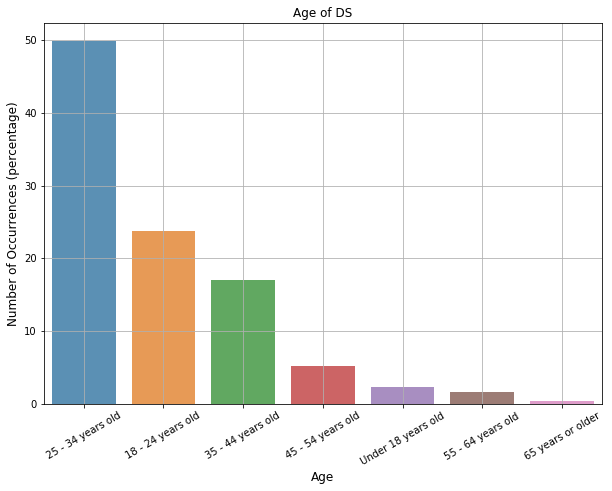

In [14]:
var='Age'

getUniqueInCol(dfr_ds,var)
var_tmp=aggregateMultSel(dfr_ds,var)
tit='Age of DS'; ylab='Number of Occurrences (percentage)';xlab='Age'
barPlot(var_tmp,tit,ylab,xlab)
plt.xticks(rotation=30)
plt.savefig(var+'.png')

### Formal education 

Input column Name is FormalEducation
Numer of unique non-null values in the given column is : 6

 They are (in counts) 

Bachelors       2451
Masters         2408
No degree       1129
Doctoral         794
Professional     102
Associate         99
Name: FormalEducation, dtype: int64

 and in relative percentage ... 

Bachelors       35.099527
Masters         34.483746
No degree       16.167836
Doctoral        11.370471
Professional     1.460690
Associate        1.417729
Name: FormalEducation, dtype: float64


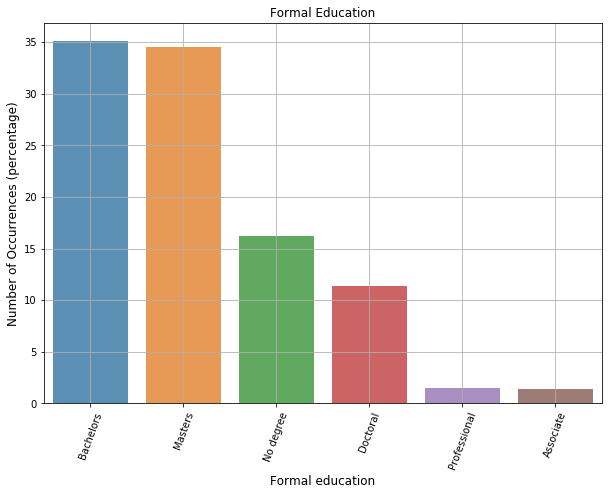

In [15]:
var='FormalEducation'
getUniqueInCol(dfr_ds,var)
var_tmp=aggregateMultSel(dfr_ds,var)
tit='Formal Education'; ylab='Number of Occurrences (percentage)'; xlab='Formal education'
barPlot(var_tmp,tit,ylab,xlab)
plt.savefig(var+'.png')

### Undergraduate major

Input column Name is UndergradMajor
Numer of unique non-null values in the given column is : 8

 They are (in counts) 

CompSci            3286
MathStat            698
NatSci              696
Eng                 652
Arts/Humanities     319
IT                  269
Business            147
Other               132
Name: UndergradMajor, dtype: int64

 and in relative percentage ... 

CompSci            53.008550
MathStat           11.259881
NatSci             11.227617
Eng                10.517825
Arts/Humanities     5.145991
IT                  4.339410
Business            2.371350
Other               2.129376
Name: UndergradMajor, dtype: float64


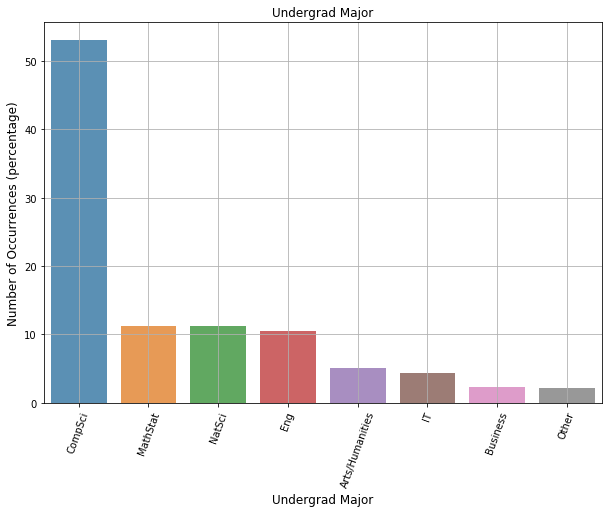

In [16]:
var='UndergradMajor'
getUniqueInCol(dfr_ds,var)
var_tmp=aggregateMultSel(dfr_ds,var)
tit='Undergrad Major'; ylab='Number of Occurrences (percentage)'; xlab='Undergrad Major'
barPlot(var_tmp,tit,ylab,xlab)
plt.savefig(var+'.png')

### Life Outside work

#### Waketime

In [17]:
var='WakeTime'
getUniqueInCol(dfr_ds,var)
var_tmp=aggregateMultSel(dfr_ds,var)    

Input column Name is WakeTime
Numer of unique non-null values in the given column is : 11

 They are (in counts) 

Between 7:01 - 8:00 AM          1658
Between 6:01 - 7:00 AM          1554
Between 8:01 - 9:00 AM           760
Between 5:00 - 6:00 AM           660
I do not have a set schedule     345
Between 9:01 - 10:00 AM          313
Before 5:00 AM                   174
Between 10:01 - 11:00 AM          87
Between 11:01 AM - 12:00 PM       30
I work night shifts               28
After 12:01 PM                    23
Name: WakeTime, dtype: int64

 and in relative percentage ... 

Between 7:01 - 8:00 AM          29.438920
Between 6:01 - 7:00 AM          27.592330
Between 8:01 - 9:00 AM          13.494318
Between 5:00 - 6:00 AM          11.718750
I do not have a set schedule     6.125710
Between 9:01 - 10:00 AM          5.557528
Before 5:00 AM                   3.089489
Between 10:01 - 11:00 AM         1.544744
Between 11:01 AM - 12:00 PM      0.532670
I work night shifts              0.4

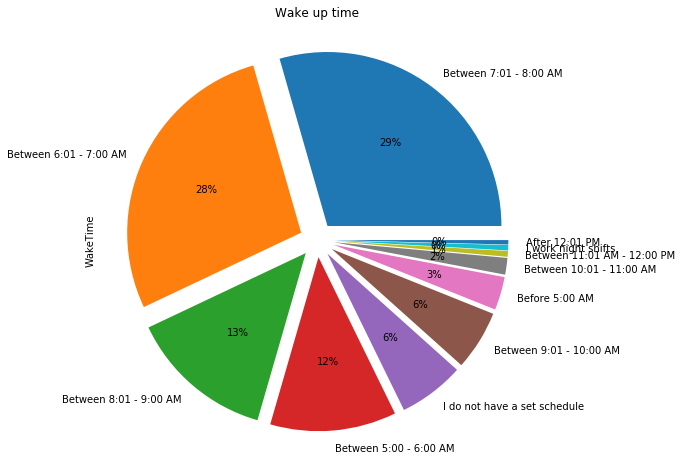

In [18]:
plt.figure(figsize=(10,7))
x=dfr_ds['WakeTime'].value_counts().dropna()
explode = (0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1)  
x.plot(kind='pie', figsize=(8,8), title = 'Wake up time',autopct='%1.0f%%',explode=explode,shadow=False)

#### Hours spend on computer and outside

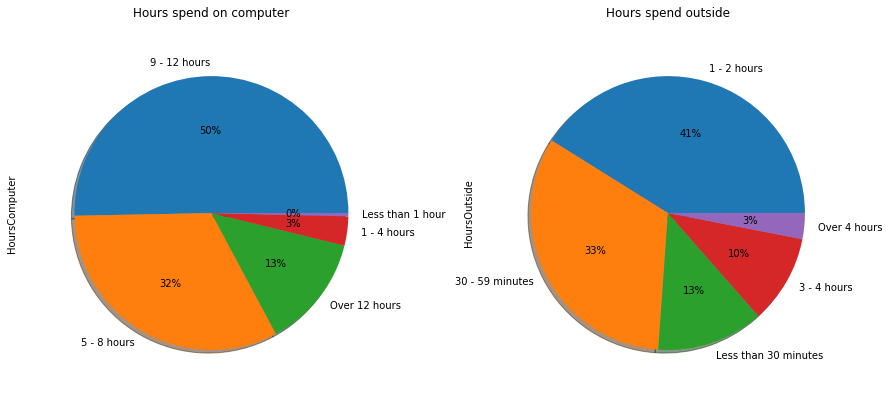

In [19]:
plt.figure(figsize=(10,10))
plt.subplot(121)
#plt.axes().set_ylabel('')
x=dfr_ds['HoursComputer'].value_counts().dropna()
x.plot(kind='pie', figsize=(15,15), title = 'Hours spend on computer',autopct='%1.0f%%',shadow=True,radius=0.9)
plt.subplot(122)
x=dfr_ds['HoursOutside'].value_counts().dropna()
x.plot(kind='pie', figsize=(15,15), title = 'Hours spend outside',autopct='%1.0f%%',shadow=True,radius=0.9)
plt.savefig('hoursSpend'+'.png')

#### Exercise hours


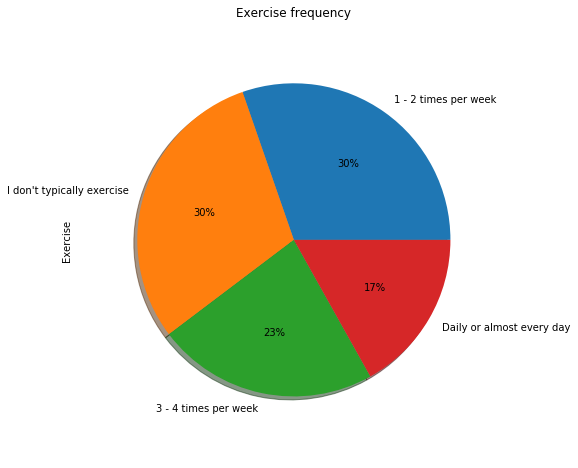

In [20]:
x=dfr_ds['Exercise'].value_counts().dropna()
x_leg=dfr_ds['Exercise'].dropna().sort_values().unique()
x.plot(kind='pie', figsize=(8,8), title = 'Exercise frequency',autopct='%1.0f%%',shadow=True,radius=0.9)
plt.savefig('excerciseHours'+'.png')

## Technology used

### Language worked with

Respondents can choose multiple answers here, so we need to do some processing and aggregate to get the total count

In [21]:
var='LanguageWorkedWith'
var_tmp=aggregateMultSel(dfr_ds,var)
var_tmp
#var_tmp.sum(axis = 0)

,Item,Count,pcnt_count
0,Python,4597,11.092879
1,SQL,3501,8.448155
2,HTML,3422,8.257523
3,JavaScript,3295,7.951063
4,CSS,3139,7.574624
5,Bash/Shell,3101,7.482928
6,Java,2736,6.602157
7,C++,2189,5.282208
8,R,2036,4.913009
9,C,1874,4.522092


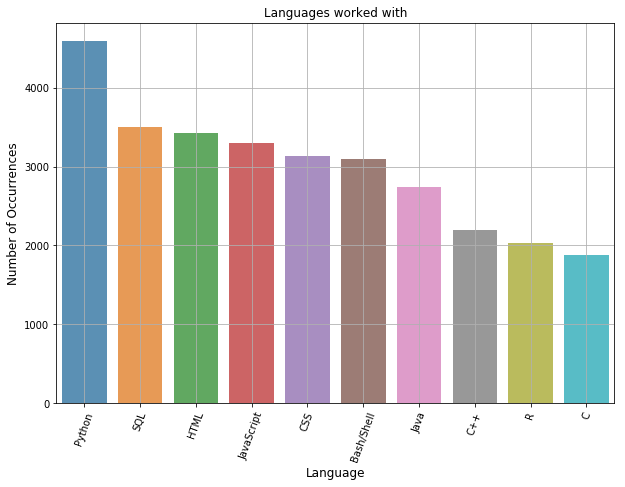

In [22]:
#plot the first 10 only
var='LanguageWorkedWith'
var_tmp=aggregateMultSel(dfr_ds,var)
tit='Languages worked with'; ylab='Number of Occurrences';xlab='Language'
bar10Plot(var_tmp,tit,ylab,xlab)
plt.savefig(var+'.png')

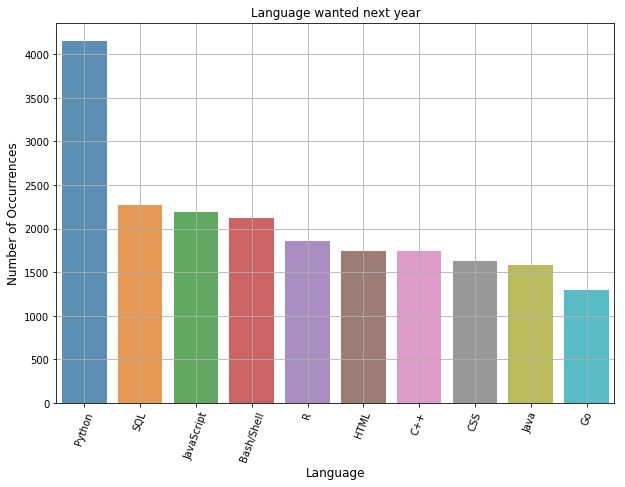

In [23]:
var='LanguageDesireNextYear'
var_tmp=aggregateMultSel(dfr_ds,var)
tit='Language wanted next year'; ylab='Number of Occurrences';xlab='Language'
bar10Plot(var_tmp,tit,ylab,xlab)
plt.savefig(var+'.png')

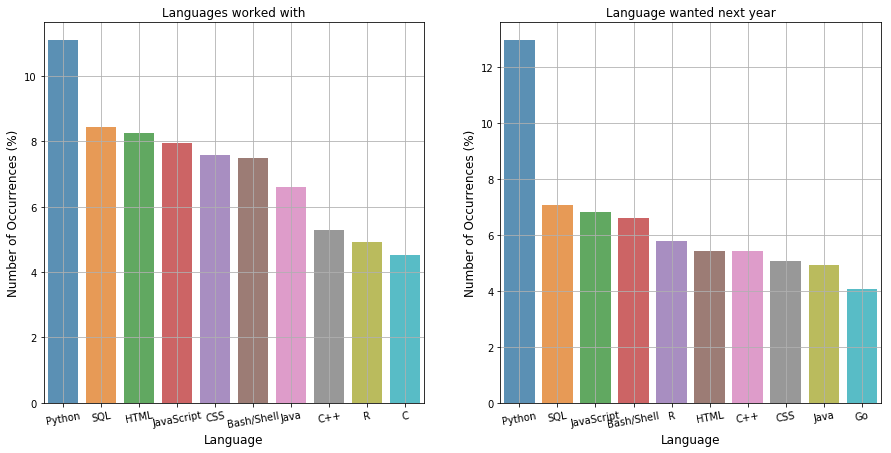

In [24]:
#plot the first 10, now in relative percentage
plt.figure(figsize=(15,7))
plt.subplot(121)
#
var='LanguageWorkedWith'
var_tmp=aggregateMultSel(dfr_ds,var)
tit='Languages worked with'; ylab='Number of Occurrences (%)';xlab='Language'
x=var_tmp.Item[:10,] #first 10
y=var_tmp.Count
y=y/(y.sum())*100
sns.barplot(x,y, alpha=0.8)
plt.title(tit)
plt.ylabel(ylab, fontsize=12)
plt.xlabel(xlab, fontsize=12)
plt.xticks(rotation=10)
plt.grid()
#
plt.subplot(122)
var='LanguageDesireNextYear'
var_tmp=aggregateMultSel(dfr_ds,var)
tit='Language wanted next year'; ylab='Number of Occurrences (%)';xlab='Language'
x=var_tmp.Item[:10,] #first 10
y=var_tmp.Count
y=y/(y.sum())*100
sns.barplot(x,y, alpha=0.8)
plt.title(tit)
plt.ylabel(ylab, fontsize=12)
plt.xlabel(xlab, fontsize=12)
plt.xticks(rotation=10)
plt.grid()
plt.savefig('Language_pcnt'+'.png')

### DatabaseWorkedWith

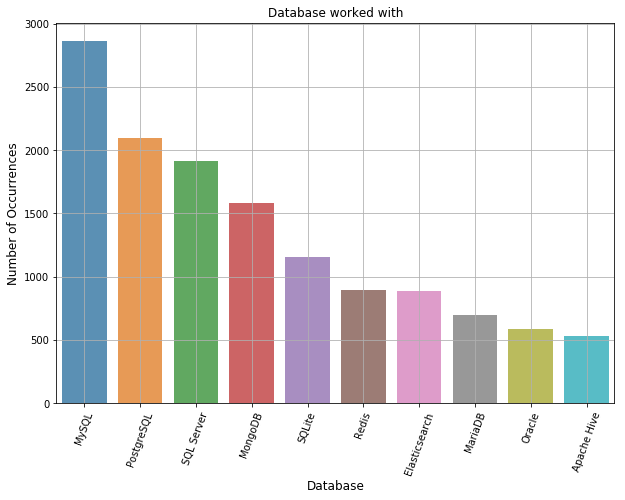

In [25]:
var='DatabaseWorkedWith'
var_tmp=aggregateMultSel(dfr_ds,var)
tit='Database worked with'; ylab='Number of Occurrences';xlab='Database'
bar10Plot(var_tmp,tit,ylab,xlab)
plt.savefig(var+'.png')

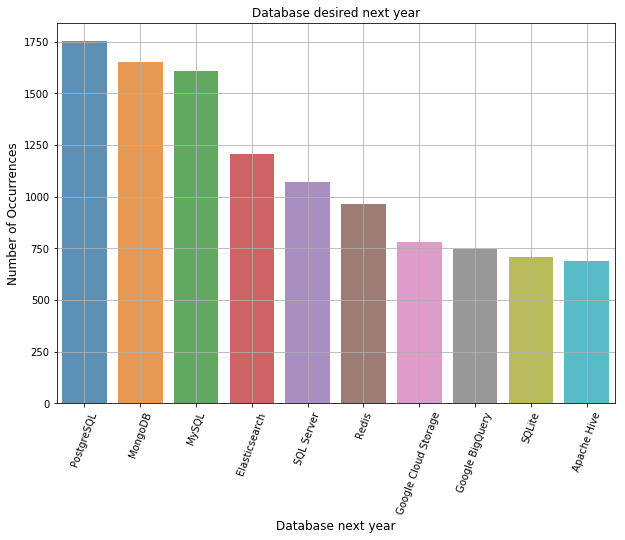

In [26]:
var='DatabaseDesireNextYear'
var_tmp=aggregateMultSel(dfr_ds,var)
tit='Database desired next year'; ylab='Number of Occurrences';xlab='Database next year'
bar10Plot(var_tmp,tit,ylab,xlab)
plt.savefig(var+'.png')

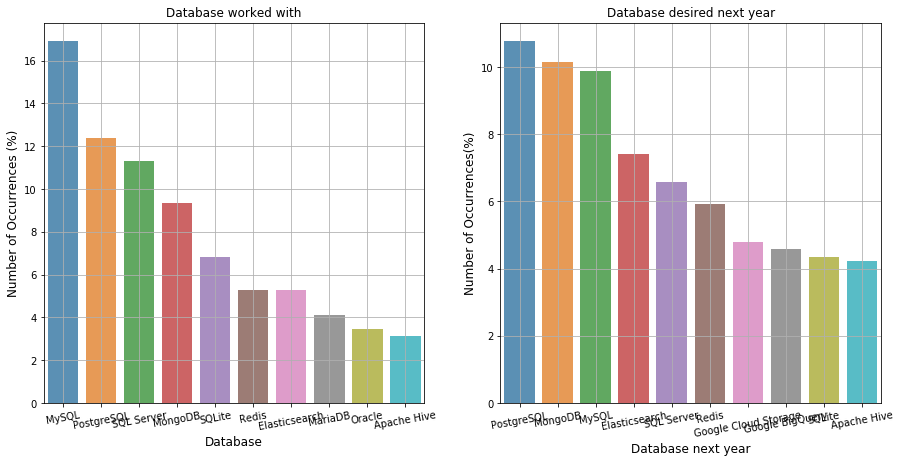

In [27]:
#plot the first 10, now in relative percentage
plt.figure(figsize=(15,7))
plt.subplot(121)
#
var='DatabaseWorkedWith'
var_tmp=aggregateMultSel(dfr_ds,var)
tit='Database worked with'; ylab='Number of Occurrences (%)';xlab='Database'
x=var_tmp.Item[:10,] #first 10
y=var_tmp.Count
y=y/(y.sum())*100
sns.barplot(x,y, alpha=0.8)
plt.title(tit)
plt.ylabel(ylab, fontsize=12)
plt.xlabel(xlab, fontsize=12)
plt.xticks(rotation=10)
plt.grid()
#
plt.subplot(122)
var='DatabaseDesireNextYear'
var_tmp=aggregateMultSel(dfr_ds,var)
tit='Database desired next year'; ylab='Number of Occurrences(%)';xlab='Database next year'
x=var_tmp.Item[:10,] #first 10
y=var_tmp.Count
y=y/(y.sum())*100
sns.barplot(x,y, alpha=0.8)
plt.title(tit)
plt.ylabel(ylab, fontsize=12)
plt.xlabel(xlab, fontsize=12)
plt.xticks(rotation=10)
plt.grid()
plt.savefig('DB_pcnt'+'.png')

### Framework

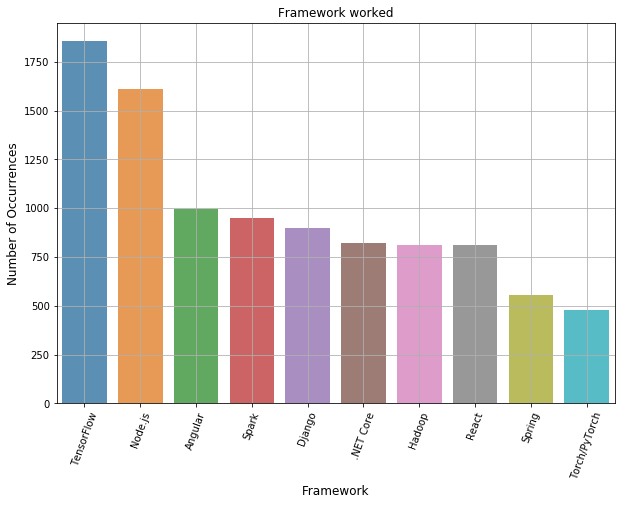

In [28]:
var='FrameworkWorkedWith'
var_tmp=aggregateMultSel(dfr_ds,var)
tit='Framework worked'; ylab='Number of Occurrences';xlab='Framework'
bar10Plot(var_tmp,tit,ylab,xlab)
plt.savefig(var+'.png')

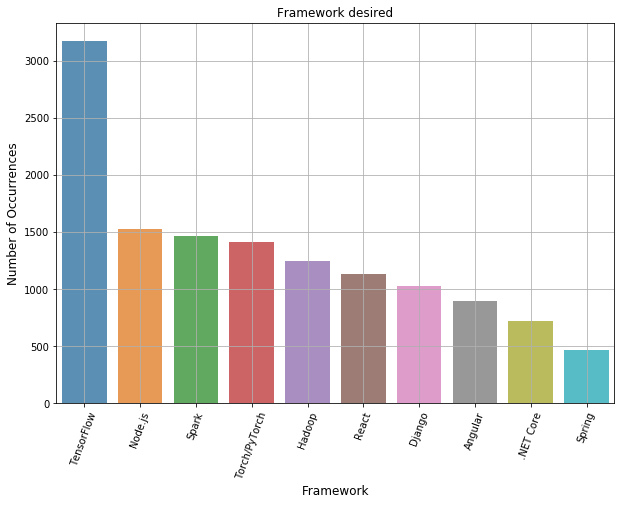

In [29]:
var='FrameworkDesireNextYear'
var_tmp=aggregateMultSel(dfr_ds,var)
tit='Framework desired'; ylab='Number of Occurrences';xlab='Framework'
bar10Plot(var_tmp,tit,ylab,xlab)
plt.savefig(var+'.png')

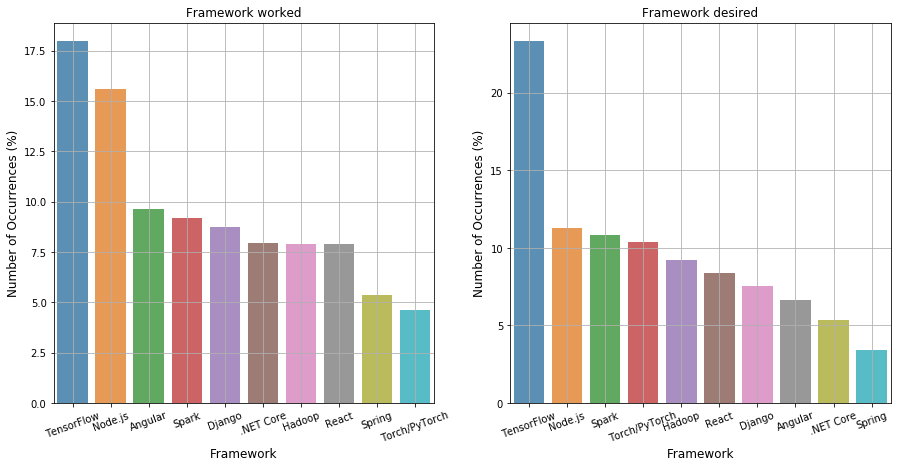

In [30]:
#plot the first 10, now in relative percentage
plt.figure(figsize=(15,7))
plt.subplot(121)
#
var='FrameworkWorkedWith'
var_tmp=aggregateMultSel(dfr_ds,var)
tit='Framework worked'; ylab='Number of Occurrences (%)';xlab='Framework'
x=var_tmp.Item[:10,] #first 10
y=var_tmp.Count
y=y/(y.sum())*100
sns.barplot(x,y, alpha=0.8)
plt.title(tit)
plt.ylabel(ylab, fontsize=12)
plt.xlabel(xlab, fontsize=12)
plt.xticks(rotation=20)
plt.grid()
#
plt.subplot(122)
var='FrameworkDesireNextYear'
var_tmp=aggregateMultSel(dfr_ds,var)
tit='Framework desired'; ylab='Number of Occurrences (%)';xlab='Framework'
x=var_tmp.Item[:10,] #first 10
y=var_tmp.Count
y=y/(y.sum())*100
sns.barplot(x,y, alpha=0.8)
plt.title(tit)
plt.ylabel(ylab, fontsize=12)
plt.xlabel(xlab, fontsize=12)
plt.xticks(rotation=20)
plt.grid()
plt.savefig('Framework_pcnt'+'.png')

## Work

### Employment status

In [31]:
var='Employment'
getUniqueInCol(dfr_ds,var)
var_tmp=aggregateMultSel(dfr_ds,var)    

Input column Name is Employment
Numer of unique non-null values in the given column is : 6

 They are (in counts) 

Employed full-time                                      4793
Independent contractor, freelancer, or self-employed     684
Not employed, but looking for work                       576
Employed part-time                                       557
Not employed, and not looking for work                   340
Retired                                                   10
Name: Employment, dtype: int64

 and in relative percentage ... 

Employed full-time                                      68.864943
Independent contractor, freelancer, or self-employed     9.827586
Not employed, but looking for work                       8.275862
Employed part-time                                       8.002874
Not employed, and not looking for work                   4.885057
Retired                                                  0.143678
Name: Employment, dtype: float64


### Company size

In [32]:
var='CompanySize'
getUniqueInCol(dfr_ds,var)
var_tmp=aggregateMultSel(dfr_ds,var)    

Input column Name is CompanySize
Numer of unique non-null values in the given column is : 8

 They are (in counts) 

20 to 99 employees          993
10,000 or more employees    967
100 to 499 employees        862
1,000 to 4,999 employees    668
10 to 19 employees          535
Fewer than 10 employees     535
500 to 999 employees        306
5,000 to 9,999 employees    279
Name: CompanySize, dtype: int64

 and in relative percentage ... 

20 to 99 employees          19.300292
10,000 or more employees    18.794947
100 to 499 employees        16.754130
1,000 to 4,999 employees    12.983479
10 to 19 employees          10.398445
Fewer than 10 employees     10.398445
500 to 999 employees         5.947522
5,000 to 9,999 employees     5.422741
Name: CompanySize, dtype: float64


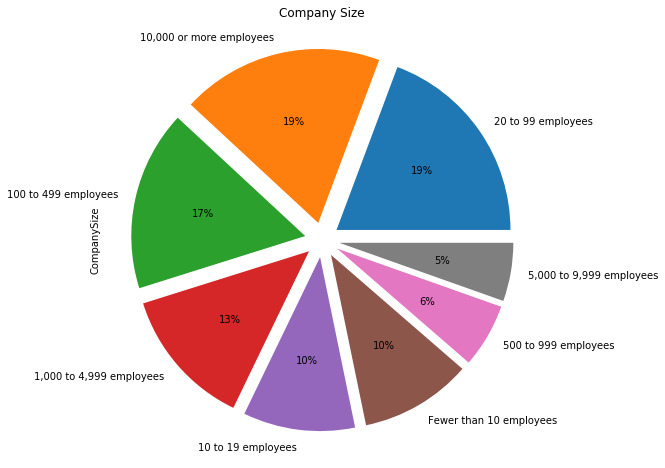

In [33]:
x=dfr_ds['CompanySize'].value_counts().dropna()
explode = (0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1)  
x.plot(kind='pie', figsize=(8,8), title = 'Company Size',autopct='%1.0f%%',explode=explode,shadow=False)
plt.savefig('companySize_pie'+'.png')

### Salary

#### Age vs salary

In [34]:
var_df=dfr_ds.dropna(subset=['ConvertedSalary','Age']) #drop NA

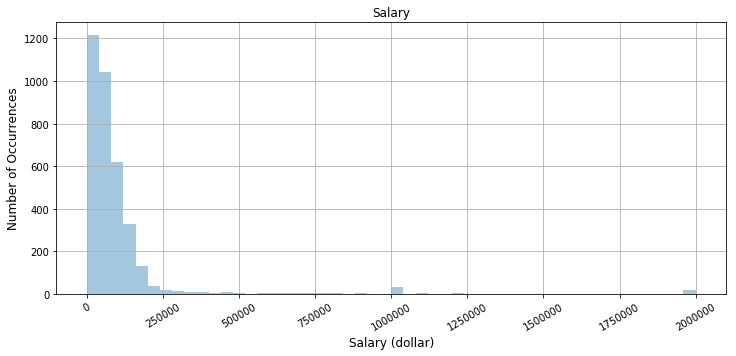

In [35]:
x=var_df.ConvertedSalary
#plt.figure(figsize=(10,7))
plt.figure(figsize=(12,5))
sns.distplot(x,kde=False)
plt.xticks(rotation=30)
plt.grid()
plt.title('Salary')
plt.ylabel('Number of Occurrences', fontsize=12)
plt.xlabel('Salary (dollar)', fontsize=12)
#plt.yscale('log')
plt.yscale('linear')

In [36]:
var_df.groupby('Age')['ConvertedSalary'].mean().sort_values(ascending =False)

Age
45 - 54 years old     155401.643979
55 - 64 years old     146899.369565
35 - 44 years old     138855.135303
65 years or older     124411.166667
25 - 34 years old      96087.396471
18 - 24 years old      61768.964489
Under 18 years old     46254.551724
Name: ConvertedSalary, dtype: float64

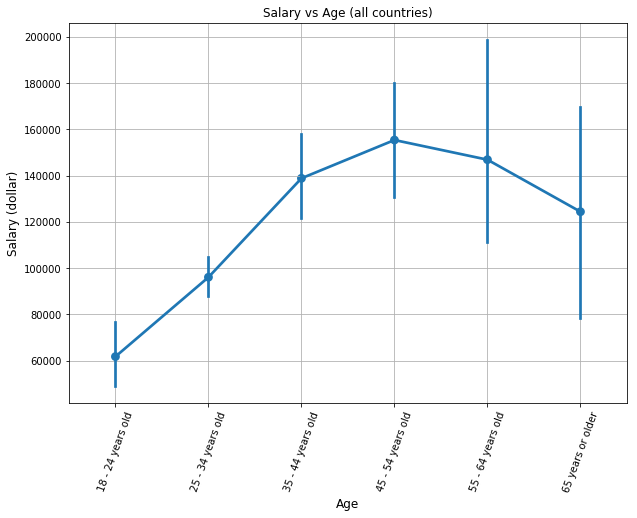

In [37]:
order_tmp=["18 - 24 years old","25 - 34 years old","35 - 44 years old", "45 - 54 years old", "55 - 64 years old",
           "65 years or older"] 
x=var_df.Age; y=var_df.ConvertedSalary
tit='Salary vs Age (all countries)'; xlab='Age'; ylab='Salary (dollar)'
pointPlot(x,y,tit,ylab,xlab,order_tmp)
figname='salaryAgeAll.png'
plt.savefig(figname)

In [38]:
#just US alone
country_us_df = var_df[var_df.Country == 'United States']
country_us_df.groupby('Age')['ConvertedSalary'].mean().sort_values(ascending =False)

Age
65 years or older     180000.000000
35 - 44 years old     179940.690987
45 - 54 years old     167309.045977
55 - 64 years old     159035.806452
25 - 34 years old     144633.145390
18 - 24 years old     138468.731707
Under 18 years old     27510.000000
Name: ConvertedSalary, dtype: float64

In [39]:
#rest_of_world
country_rest_df = var_df[var_df.Country != 'United States']
country_rest_df.groupby('Age')['ConvertedSalary'].mean().sort_values(ascending =False)

Age
45 - 54 years old     145440.644231
55 - 64 years old     121817.400000
35 - 44 years old     115506.514634
65 years or older      96616.750000
25 - 34 years old      75999.500367
Under 18 years old     56120.105263
18 - 24 years old      38474.961111
Name: ConvertedSalary, dtype: float64

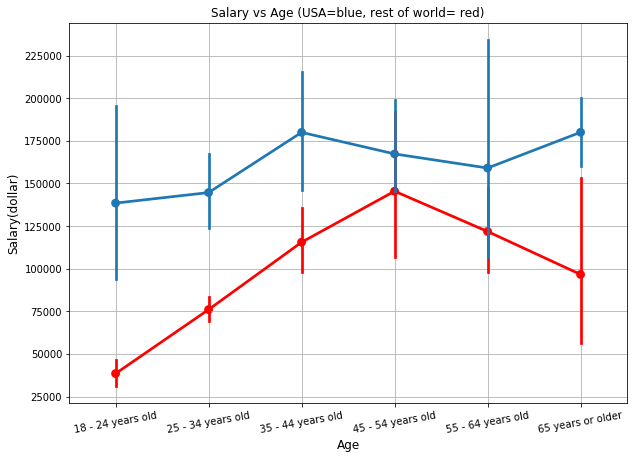

In [40]:
order_tmp=["18 - 24 years old","25 - 34 years old","35 - 44 years old", "45 - 54 years old", "55 - 64 years old",
           "65 years or older"]          
plt.figure(figsize=(10,7))

sns.pointplot(country_rest_df.Age,country_rest_df.ConvertedSalary,alpha=0.8,order=order_tmp,color='red')
sns.pointplot(country_us_df.Age,country_us_df.ConvertedSalary,alpha=0.8,order=order_tmp)
# Rotate the labels on x-axis
plt.title('Salary vs Age (USA=blue, rest of world= red)')
plt.ylabel('Salary(dollar)', fontsize=12)
plt.xticks(rotation=10)
plt.xlabel('Age', fontsize=12)
plt.grid()
figname='salaryAge_USA.png'
plt.savefig(figname)

#### Years of coding  vs salary

In [41]:
var_df=dfr_ds.dropna(subset=['YearsCodingProf','ConvertedSalary']) 
var_df.groupby('YearsCodingProf')['ConvertedSalary'].mean().sort_values(ascending =True)

YearsCodingProf
0-2 years            64959.863504
3-5 years            92816.321829
9-11 years          114067.851393
6-8 years           117441.059965
21-23 years         122114.875000
12-14 years         127743.037838
18-20 years         154772.900000
24-26 years         161697.906977
27-29 years         164999.545455
15-17 years         173750.201342
30 or more years    181598.857143
Name: ConvertedSalary, dtype: float64

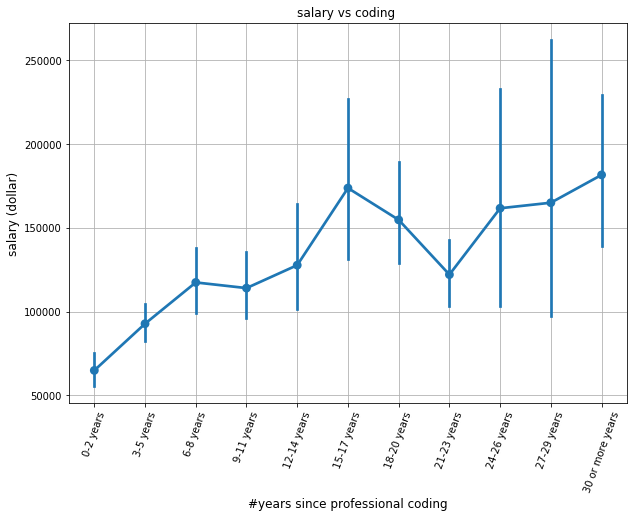

In [42]:
order_tmp=["0-2 years","3-5 years","6-8 years","9-11 years", "12-14 years", "15-17 years", "18-20 years", "21-23 years",
         "24-26 years","27-29 years","30 or more years"]
x=var_df.YearsCodingProf; y=var_df.ConvertedSalary
tit='salary vs coding '; xlab='#years since professional coding'; ylab='salary (dollar)'
pointPlot(x,y,tit,ylab,xlab,order_tmp)
figname='salaryProfCodingAll.png'
plt.savefig(figname)


#### Formal education  vs  salary

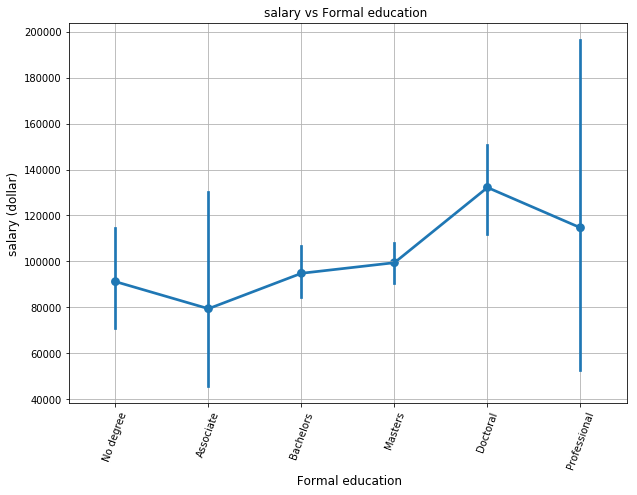

In [43]:
var_df=dfr_ds.dropna(subset=['FormalEducation','ConvertedSalary']) 
order_tmp=["No degree","Associate","Bachelors","Masters", "Doctoral", "Professional"]
x=var_df.FormalEducation; y=var_df.ConvertedSalary
tit='salary vs Formal education '; xlab=' Formal education'; ylab='salary (dollar)'
pointPlot(x,y,tit,ylab,xlab,order_tmp)
figname='salaryFormaleducation.png'
plt.savefig(figname)

#### Undergrad major vs  salary

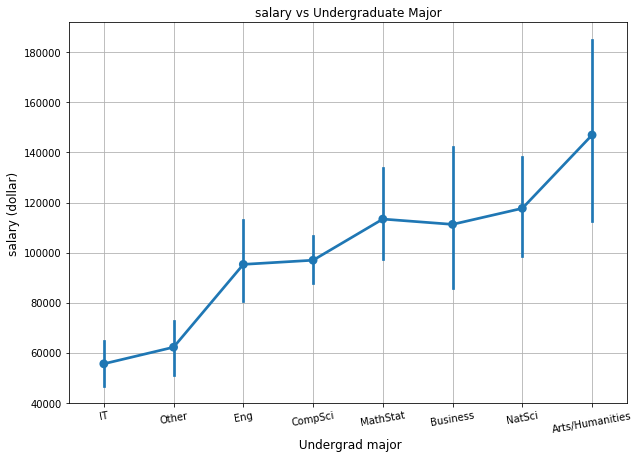

In [44]:
var_df=dfr_ds.dropna(subset=['UndergradMajor','ConvertedSalary']) 
order_tmp=["IT","Other", "Eng","CompSci","MathStat","Business","NatSci","Arts/Humanities"]
x=var_df.UndergradMajor; y=var_df.ConvertedSalary
tit='salary vs Undergraduate Major'; xlab=' Undergrad major'; ylab='salary (dollar)'
pointPlot(x,y,tit,ylab,xlab,order_tmp)
plt.xticks(rotation=10)
figname='salaryUnderGradMajor.png'
plt.savefig(figname)

#### Company size vs salary

In [45]:
dfr_ds.groupby('CompanySize')['ConvertedSalary'].mean().sort_values(ascending =True)

CompanySize
Fewer than 10 employees      84444.704180
100 to 499 employees         92176.602273
5,000 to 9,999 employees     92232.447917
1,000 to 4,999 employees    102169.133652
20 to 99 employees          104713.457237
10 to 19 employees          113020.896667
500 to 999 employees        115438.168421
10,000 or more employees    140613.313659
Name: ConvertedSalary, dtype: float64

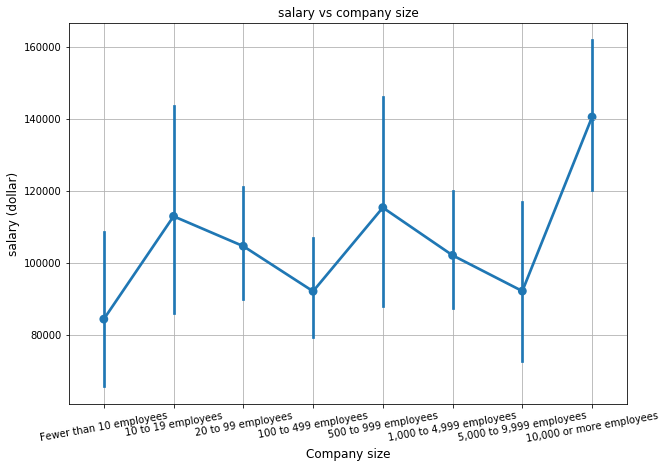

In [46]:
##
var_df=dfr_ds.dropna(subset=['CompanySize','ConvertedSalary']) 
order_tmp=["Fewer than 10 employees","10 to 19 employees","20 to 99 employees","100 to 499 employees",
           "500 to 999 employees","1,000 to 4,999 employees","5,000 to 9,999 employees","10,000 or more employees"]
x=var_df.CompanySize; y=var_df.ConvertedSalary
tit='salary vs company size'; xlab='Company size'; ylab='salary (dollar)'
pointPlot(x,y,tit,ylab,xlab,order_tmp)
plt.xticks(rotation=10)
figname='salaryCompanySize.png'
plt.savefig(figname)

#### Junior DS salary vs company size

In [47]:
#just juniors
tmp_df = var_df[var_df.YearsCodingProf == '0-2 years']
tmp_df.groupby('Age')['ConvertedSalary'].mean().sort_values(ascending =False)
tmp_df.groupby('CompanySize')['ConvertedSalary'].mean().sort_values(ascending =True)

CompanySize
Fewer than 10 employees      39251.166667
5,000 to 9,999 employees     44209.463415
500 to 999 employees         61027.584906
100 to 499 employees         70626.485075
10 to 19 employees           70871.212766
20 to 99 employees           76655.389937
1,000 to 4,999 employees     77390.708333
10,000 or more employees    104747.746479
Name: ConvertedSalary, dtype: float64

In [48]:
#senior
tmp1_df = var_df[var_df.YearsCodingProf != '0-2 years']
tmp1_df.groupby('Age')['ConvertedSalary'].mean().sort_values(ascending =False)
tmp1_df.groupby('CompanySize')['ConvertedSalary'].mean().sort_values(ascending =True)

CompanySize
100 to 499 employees         99505.829949
5,000 to 9,999 employees    105271.801325
Fewer than 10 employees     106500.880383
1,000 to 4,999 employees    109533.619195
20 to 99 employees          114649.387528
10 to 19 employees          132254.247573
500 to 999 employees        136487.518248
10,000 or more employees    151905.798226
Name: ConvertedSalary, dtype: float64

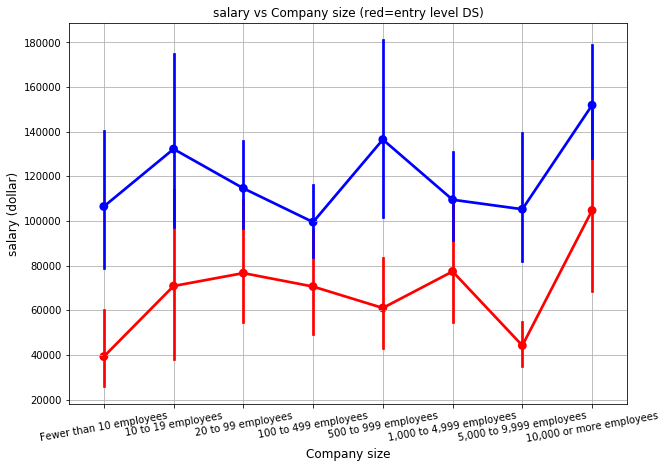

In [49]:
order_tmp=["Fewer than 10 employees","10 to 19 employees","20 to 99 employees","100 to 499 employees",
           "500 to 999 employees","1,000 to 4,999 employees","5,000 to 9,999 employees","10,000 or more employees"]
plt.figure(figsize=(10,7))
sns.pointplot(tmp_df.CompanySize,tmp_df.ConvertedSalary,alpha=0.8,order=order_tmp,color='red')
sns.pointplot(tmp1_df.CompanySize,tmp1_df.ConvertedSalary,alpha=0.8,order=order_tmp,color='blue')
# Rotate the labels on x-axis
plt.title('salary vs Company size (red=entry level DS)')
plt.ylabel('salary (dollar)', fontsize=12)
plt.xticks(rotation=10)
plt.xlabel('Company size', fontsize=12)
plt.grid()
figname='salaryCompanySize_juniorDS.png'
plt.savefig(figname)

## Summary
- What is the general profile of a data scientist?

Our analysis also shows DS are dominated by newbies, about three-fourths of the DS are less than 35 years old.
About 0.2% are 65 years or old. In terms of education 35% of the DS have Bachelor's degree, another 35% are with a Master's degree, while 11% have a Doctoral degree. They typically spend vast majority of their time on computers. About 50% spend 9 to 12 hours a day about 13% says they spend well over 12 hours of their day on computers. About three-fourth of the DS respondents said they spend at least an hour outside. However, this time could be recreation time, commute time etc. About 40% said they exercise of at least 3–4 times a week. Unfortunately about 30% said they don't typically exercise at all!.

- How is the typical employment, schedule  and salaries look like?

Close to 70%  of the DS responded that they work a full-time job. Close to 10% are freelancers, or self-employed. Following chart shows the company size vs the relative percentage (aji: figure). Nearly 40% of DS work for large organizations with 1000 or more employees. Top earners vary by their age bracket, perhaps connected to the experience they gain over the years. On an average, US data scientists earn considerably more money, especially in their early career. Data suggests 18–24 year old data sceintists earns anywhere between $\$100,000$ to $\$200,000$

- What type of technology is needed to break into this field?.

  * Language
  
The top language seems to be Python, followed by SQL and HTML. Folks who doesn't know Python, really wanted to learn it in the next year. If you are trying to get into DS field, definitely Python and SQL should be in your top priority list. 

  * Database
  
It seems SQL databases are most commonly used. Document store database MongoDB, Java based Elasticsearch and Redis is increasing their popularity.

  * Framework
  
In terms of framework, Tensorflow has huge popularity. Torch/Pytorch and, other Big Data frameworks like Apache Spark are gaining more traction and popularity.
